In [0]:
#Upgrade to tensorflow2.x
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 33kB/s 
     |████████████████████████████████| 450kB 41.2MB/s 
     |████████████████████████████████| 3.9MB 57.6MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf

import sklearn
from sklearn.metrics import jaccard_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, UpSampling2D, GlobalAveragePooling2D, concatenate
from tensorflow.keras.layers import Dense, Dropout, Activation, Reshape, Flatten
# from tensorflow.keras.utils import np_utils
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.callbacks import CSVLogger
# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

import numpy as np
import os
import cv2
import imutils
import random
from PIL import Image
import matplotlib.pyplot as plt
import requests
import shutil
import json
import pandas as pd

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.2.0-rc2
Running on TPU  ['10.125.15.186:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.125.15.186:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.125.15.186:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [0]:
print(tf.__version__)

2.2.0-rc2


In [0]:
print(os.getcwd())



/content


In [28]:
from google.colab import drive
drive.mount('/content/drive/')
!ls /content/drive/My\ Drive/JSTP

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 20191029_125129.mp4   test_frames   train_frames   val_frames
'JSTP slide.mp4'       test_masks    train_masks    val_masks


['20191029_125129.mp4',
 'JSTP slide.mp4',
 'train_masks',
 'test_masks',
 'train_frames',
 'val_masks',
 'val_frames',
 'test_frames']

Copying file://adc.json [Content-Type=application/json]...
AccessDeniedException: 403 The project to be billed is associated with an absent billing account.
cat: /train_frames: No such file or directory


In [0]:
DATA_PATH = 'drive/My Drive/JSTP'

train_frame_path = DATA_PATH+'/train_frames/'
train_mask_path = DATA_PATH+'/train_masks/'

val_frame_path = DATA_PATH+'/val_frames/'
val_mask_path = DATA_PATH+'/val_masks/'

img_path = os.listdir(train_frame_path)
mask_path = os.listdir(train_mask_path)
random.shuffle(img_path)
random.shuffle(mask_path)

train_img = np.zeros((50, 640, 360, 3)).astype('float')
train_mask = np.zeros((50, 640, 360, 1)).astype('float')

for i in range(0, 50): #initially from 0 to 16, c = 0. 
        
    train_img1 = cv2.imread(train_frame_path+img_path[i])/255.
    
    if train_img1.shape != (1920,1080):
        train_img1 = imutils.rotate_bound(train_img1, 90)
        
    train_img1 =  cv2.resize(train_img1, (360, 640))# Read an image from folder and resize
    train_img1 = train_img1.reshape(640, 360, 3) # Add extra dimension for parity with train_img size [512 * 512 * 3]
    train_img[i] = train_img1 #add to array - img[0], img[1], and so on.
        
    train_mask1 = cv2.imread(train_mask_path+mask_path[i], cv2.IMREAD_GRAYSCALE)/255.
    if train_mask1.shape != (1920,1080): train_mask1 = imutils.rotate_bound(train_mask1, 90)

    train_mask1 = cv2.resize(train_mask1, (360, 640))

    train_mask1 = train_mask1.reshape(640, 360, 1) # Add extra dimension for parity with train_img size [512 * 512 * 3]

    train_mask[i] = train_mask1
    
# Validation set
    
img_path = os.listdir(val_frame_path)
mask_path = os.listdir(val_mask_path)
val_img = np.zeros((10, 640, 360, 3)).astype('float')
val_mask = np.zeros((10, 640, 360, 1)).astype('float')

for i in range(0, 10): #initially from 0 to 16, c = 0. 
        
    val_img1 = cv2.imread(val_frame_path+img_path[i])/255.
    
    if val_img1.shape != (1920,1080): 
        val_img1 = imutils.rotate_bound(val_img1, 90)
        
    val_img1 =  cv2.resize(val_img1, (360, 640))# Read an image from folder and resize
    val_img1 = val_img1.reshape(640, 360, 3) # Add extra dimension for parity with train_img size [512 * 512 * 3]
    val_img[i] = val_img1 #add to array - img[0], img[1], and so on.
        
    val_mask1 = cv2.imread(val_mask_path+mask_path[i], cv2.IMREAD_GRAYSCALE)/255.
    if val_mask1.shape != (1920,1080): val_mask1 = imutils.rotate_bound(val_mask1, 90)

    val_mask1 = cv2.resize(val_mask1, (360, 640))

    val_mask1 = val_mask1.reshape(640, 360, 1) # Add extra dimension for parity with train_img size [512 * 512 * 3]

    val_mask[i] = val_mask1
    
'''
def data_gen(img_folder, mask_folder):
    n = os.listdir(img_folder) #List of training images
    random.shuffle(n)
    
    print(n)
    
    img = np.zeros(50, 360, 640, 1).astype('float')
    mask = np.zeros(50, 360, 640, 1).astype('float')
    print(img,mask)
    for i in range(0, 50): #initially from 0 to 16, c = 0. 
        
        train_img = cv2.imread(img_folder+n[i])/255.
        train_img =  cv2.resize(train_img, (360, 640))# Read an image from folder and resize
      
        img[i] = train_img #add to array - img[0], img[1], and so on.
        
        print(img[i])
        
        train_mask = cv2.imread(mask_folder+n[i], cv2.IMREAD_GRAYSCALE)/255.
        train_mask = cv2.resize(train_mask, (360, 640))
        train_mask = train_mask.reshape(360, 640, 1) # Add extra dimension for parity with train_img size [512 * 512 * 3]

        mask[i] = train_mask
    
    yield img, mask
    
'''


"\ndef data_gen(img_folder, mask_folder):\n    n = os.listdir(img_folder) #List of training images\n    random.shuffle(n)\n    \n    print(n)\n    \n    img = np.zeros(50, 360, 640, 1).astype('float')\n    mask = np.zeros(50, 360, 640, 1).astype('float')\n    print(img,mask)\n    for i in range(0, 50): #initially from 0 to 16, c = 0. \n        \n        train_img = cv2.imread(img_folder+n[i])/255.\n        train_img =  cv2.resize(train_img, (360, 640))# Read an image from folder and resize\n      \n        img[i] = train_img #add to array - img[0], img[1], and so on.\n        \n        print(img[i])\n        \n        train_mask = cv2.imread(mask_folder+n[i], cv2.IMREAD_GRAYSCALE)/255.\n        train_mask = cv2.resize(train_mask, (360, 640))\n        train_mask = train_mask.reshape(360, 640, 1) # Add extra dimension for parity with train_img size [512 * 512 * 3]\n\n        mask[i] = train_mask\n    \n    yield img, mask\n    \n"

In [0]:
DATA_PATH = 'drive/My Drive/JSTP'

train_frame_path = DATA_PATH+'/train_frames/'
train_mask_path = DATA_PATH+'/train_masks/'

val_frame_path = DATA_PATH+'/val_frames/'
val_mask_path = DATA_PATH+'/val_masks/'

img_path = os.listdir(train_frame_path)
mask_path = os.listdir(train_mask_path)
random.shuffle(img_path)
random.shuffle(mask_path)

train_img = np.zeros((50, 512, 512, 3)).astype('float')
train_mask = np.zeros((50, 512, 512, 1)).astype('float')

for i in range(0, 50): #initially from 0 to 16, c = 0. 
        
    train_img1 = cv2.imread(train_frame_path+img_path[i])/255.
    
    if train_img1.shape != (1920,1080):
        train_img1 = imutils.rotate_bound(train_img1, 90)
        
    train_img1 =  cv2.resize(train_img1, (512, 512))# Read an image from folder and resize
    train_img1 = train_img1.reshape(512, 512, 3) # Add extra dimension for parity with train_img size [512 * 512 * 3]
    train_img[i] = train_img1 #add to array - img[0], img[1], and so on.
        
    train_mask1 = cv2.imread(train_mask_path+mask_path[i], cv2.IMREAD_GRAYSCALE)/255.
    if train_mask1.shape != (1920,1080): train_mask1 = imutils.rotate_bound(train_mask1, 90)

    train_mask1 = cv2.resize(train_mask1, (512, 512))

    train_mask1 = train_mask1.reshape(512, 512, 1) # Add extra dimension for parity with train_img size [512 * 512 * 3]

    train_mask[i] = train_mask1
    
# Validation set
    
img_path = os.listdir(val_frame_path)
mask_path = os.listdir(val_mask_path)
val_img = np.zeros((10, 512, 512, 3)).astype('float')
val_mask = np.zeros((10, 512, 512, 1)).astype('float')

for i in range(0, 10): #initially from 0 to 16, c = 0. 
        
    val_img1 = cv2.imread(val_frame_path+img_path[i])/255.
    
    if val_img1.shape != (1920,1080): 
        val_img1 = imutils.rotate_bound(val_img1, 90)
        
    val_img1 =  cv2.resize(val_img1, (512, 512))# Read an image from folder and resize
    val_img1 = val_img1.reshape(512, 512, 3) # Add extra dimension for parity with train_img size [512 * 512 * 3]
    val_img[i] = val_img1 #add to array - img[0], img[1], and so on.
        
    val_mask1 = cv2.imread(val_mask_path+mask_path[i], cv2.IMREAD_GRAYSCALE)/255.
    if val_mask1.shape != (1920,1080): val_mask1 = imutils.rotate_bound(val_mask1, 90)

    val_mask1 = cv2.resize(val_mask1, (512, 512))

    val_mask1 = val_mask1.reshape(512, 512, 1) # Add extra dimension for parity with train_img size [512 * 512 * 3]

    val_mask[i] = val_mask1
    
'''
def data_gen(img_folder, mask_folder):
    n = os.listdir(img_folder) #List of training images
    random.shuffle(n)
    
    print(n)
    
    img = np.zeros(50, 360, 640, 1).astype('float')
    mask = np.zeros(50, 360, 640, 1).astype('float')
    print(img,mask)
    for i in range(0, 50): #initially from 0 to 16, c = 0. 
        
        train_img = cv2.imread(img_folder+n[i])/255.
        train_img =  cv2.resize(train_img, (360, 640))# Read an image from folder and resize
      
        img[i] = train_img #add to array - img[0], img[1], and so on.
        
        print(img[i])
        
        train_mask = cv2.imread(mask_folder+n[i], cv2.IMREAD_GRAYSCALE)/255.
        train_mask = cv2.resize(train_mask, (360, 640))
        train_mask = train_mask.reshape(360, 640, 1) # Add extra dimension for parity with train_img size [512 * 512 * 3]

        mask[i] = train_mask
    
    yield img, mask
    
'''


"\ndef data_gen(img_folder, mask_folder):\n    n = os.listdir(img_folder) #List of training images\n    random.shuffle(n)\n    \n    print(n)\n    \n    img = np.zeros(50, 360, 640, 1).astype('float')\n    mask = np.zeros(50, 360, 640, 1).astype('float')\n    print(img,mask)\n    for i in range(0, 50): #initially from 0 to 16, c = 0. \n        \n        train_img = cv2.imread(img_folder+n[i])/255.\n        train_img =  cv2.resize(train_img, (360, 640))# Read an image from folder and resize\n      \n        img[i] = train_img #add to array - img[0], img[1], and so on.\n        \n        print(img[i])\n        \n        train_mask = cv2.imread(mask_folder+n[i], cv2.IMREAD_GRAYSCALE)/255.\n        train_mask = cv2.resize(train_mask, (360, 640))\n        train_mask = train_mask.reshape(360, 640, 1) # Add extra dimension for parity with train_img size [512 * 512 * 3]\n\n        mask[i] = train_mask\n    \n    yield img, mask\n    \n"

In [0]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128,128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

from tensorflow_examples.models.pix2pix import pix2pix
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

9412608/9406464 [==============================] - 0s 0us/step


ModuleNotFoundError: ignored

In [0]:
def unet_model(output_channels):
  inputs = tf.keras.layers.Input(shape=[640, 360, 3])
  x = inputs

  # Downsampling through the model
  skips = down_stack(x)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [0]:
model = unet_model(3)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

NameError: ignored

In [0]:
def create_model():
  pretrained_model = tf.keras.applications.Xception(input_shape=(512, 512,3), include_top=False)
  pretrained_model.trainable = True
  model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
  ])
  model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
  )
  return model

with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 16, 16, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
Total params: 20,861,480
Trainable params: 20,806,952
Non-trainable params: 54,528
_________________________________________________________________


In [0]:
model = Sequential()


#1st Layer
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform', input_shape=(640, 360, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

#1st Layer
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

#1st Layer
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))


#Upsampling Part
model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation='nearest'))
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

#Upsampling Part
model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation='nearest'))
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

#Upsampling Part
model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation='nearest'))
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

#Upsampling Part
model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation='nearest'))
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

#Upsampling Part
model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation='nearest'))
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (17, 6), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (17, 10), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (17, 6), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(1, (1, 1), activation='sigmoid', kernel_initializer='he_uniform'))

In [0]:
(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 624, 351, 64)      32704     
_________________________________________________________________
batch_normalization (BatchNo (None, 624, 351, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 608, 342, 64)      696384    
_________________________________________________________________
batch_normalization_1 (Batch (None, 608, 342, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 304, 171, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 288, 162, 64)      696384    
_________________________________________________________________
batch_normalization_2 (Batch (None, 288, 162, 64)      2

In [0]:
print(val_img.shape)

(10, 640, 360, 3)


In [0]:
model = Sequential()


#1st Layer
model.add(Conv2D(64, (1, 1), activation='relu', kernel_initializer='he_uniform', input_shape=(512, 512,3)))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
model.add(Conv2D(64, (1, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
model.add(Conv2D(1, (1, 1), activation='sigmoid', kernel_initializer='he_uniform'))

#model.add(Conv2D(1, (1, 1), activation='sigmoid', kernel_initializer='he_uniform', input_shape=(512, 512, 3)))

In [0]:
import keras as K
from keras.optimizers import adam

def dice_coef(y_true, y_pred, smooth=1):
  intersection = K.backend.sum(y_true * y_pred, axis=[1,2,3])
  union = K.backend.sum(y_true, axis=[1,2,3]) + K.backend.sum(y_pred, axis=[1,2,3])
  dice = K.backend.mean((2. * intersection + smooth)/(union + smooth), axis=0)
  return dice

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

optimizer = adam(lr=0.001, decay=1e-6)

model.compile(optimizer = 'adam', loss=dice_coef_loss, metrics=[dice_coef])
'''
fitting = model.fit(train_img.astype(np.float32), train_mask.astype(np.float32),
                    epochs=1,
                    steps_per_epoch=10,
                    validation_data=(val_img.astype(np.float32), val_mask.astype(np.float32)))

model.save_weights('./sidewalk_weight.h5', overwrite=True)'''

"\nfitting = model.fit(train_img.astype(np.float32), train_mask.astype(np.float32),\n                    epochs=1,\n                    steps_per_epoch=10,\n                    validation_data=(val_img.astype(np.float32), val_mask.astype(np.float32)))\n\nmodel.save_weights('./sidewalk_weight.h5', overwrite=True)"

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.2.0-rc2
Running on TPU  ['10.101.127.90:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.101.127.90:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.101.127.90:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [0]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  #model = create_model()
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['sparse_categorical_accuracy'])
  
train_dataset, test_dataset = get_dataset()

model.fit(train_dataset,
          epochs=5,
          validation_data=test_dataset)

NameError: ignored

In [0]:
'''
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy'])
'''
fitting = model.fit(train_img.astype(np.float32), train_mask.astype(np.float32),
                    epochs=10,
                    steps_per_epoch=10,
                    validation_data=(val_img.astype(np.float32), val_mask.astype(np.float32)))

Epoch 1/10
10/10 [==============================] - 593s 59s/step - loss: -0.6344 - dice_coef: 0.6344 - val_loss: -8.4568e-06 - val_dice_coef: 8.4568e-06
Epoch 2/10
10/10 [==============================] - 593s 59s/step - loss: -0.8152 - dice_coef: 0.8152 - val_loss: -0.6795 - val_dice_coef: 0.6795
Epoch 3/10
10/10 [==============================] - 592s 59s/step - loss: -0.8387 - dice_coef: 0.8387 - val_loss: -0.6795 - val_dice_coef: 0.6795
Epoch 4/10
10/10 [==============================] - 595s 59s/step - loss: -0.8516 - dice_coef: 0.8516 - val_loss: -0.0106 - val_dice_coef: 0.0106
Epoch 5/10
10/10 [==============================] - 594s 59s/step - loss: -0.8499 - dice_coef: 0.8499 - val_loss: -8.4568e-06 - val_dice_coef: 8.4568e-06
Epoch 6/10
10/10 [==============================] - 595s 59s/step - loss: -0.8500 - dice_coef: 0.8500 - val_loss: -8.4568e-06 - val_dice_coef: 8.4568e-06
Epoch 7/10
10/10 [==============================] - 594s 59s/step - loss: -0.8548 - dice_coef: 0.854

In [0]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy'])

fitting = model.fit(train_img.astype(np.float32), train_mask.astype(np.float32),
                    epochs=100,
                    steps_per_epoch=10,
                    validation_data=(val_img.astype(np.float32), val_mask.astype(np.float32)))

Epoch 1/100
10/10 [==============================] - 6s 569ms/step - loss: 6.5913e-08 - accuracy: 0.3449 - val_loss: 6.1373e-08 - val_accuracy: 0.6709
Epoch 2/100
10/10 [==============================] - 6s 553ms/step - loss: 6.5913e-08 - accuracy: 0.3482 - val_loss: 6.1373e-08 - val_accuracy: 0.6556
Epoch 3/100
10/10 [==============================] - 6s 561ms/step - loss: 6.5913e-08 - accuracy: 0.3533 - val_loss: 6.1373e-08 - val_accuracy: 0.6333
Epoch 4/100
10/10 [==============================] - 5s 549ms/step - loss: 6.5913e-08 - accuracy: 0.3522 - val_loss: 6.1373e-08 - val_accuracy: 0.6051
Epoch 5/100
10/10 [==============================] - 6s 572ms/step - loss: 6.5913e-08 - accuracy: 0.3438 - val_loss: 6.1373e-08 - val_accuracy: 0.5763
Epoch 6/100
10/10 [==============================] - 6s 554ms/step - loss: 6.5913e-08 - accuracy: 0.3499 - val_loss: 6.1373e-08 - val_accuracy: 0.5512
Epoch 7/100
10/10 [==============================] - 6s 553ms/step - loss: 6.5913e-08 - accura

In [0]:
def create_model(input_shape):
  """Creates a simple convolutional neural network model using the Keras API"""
  return tf.keras.Sequential([
      tf.keras.layers.Conv2D(28, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax),
  ])

In [0]:
prediction = model.predict(train_img)

<function matplotlib.pyplot.show>

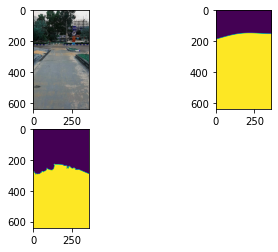

In [0]:
plt.subplot(2, 2, 1)
plt.imshow(train_img[0])
plt.subplot(2, 2, 2)
plt.imshow(prediction[0].reshape(640,360))
plt.subplot(2, 2, 3)
plt.imshow(train_mask[0].reshape(640,360))
plt.show

In [0]:
prediction = model.predict(val_img)

<function matplotlib.pyplot.show>

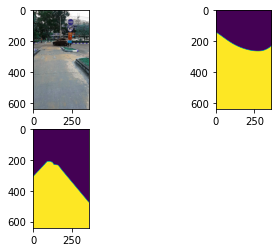

In [0]:
plt.subplot(2, 2, 1)
plt.imshow(val_img[0])
plt.subplot(2, 2, 2)
plt.imshow(prediction[0].reshape(640,360))
plt.subplot(2, 2, 3)
plt.imshow(val_mask[0].reshape(640,360))
plt.show

In [0]:
model.save_weights('./sidewalk_weight.hdf5', overwrite=True)
model.save('./sidewalk_model.h5', overwrite=True)